When Developing simulations remember to include the SEED

what I would like to start with is figuring out how they're managing data generation and how they're storing the results of each action taken. I am not quite familar but I would like to replicate their work in the book.

  --> it seems some of the implementations of the book store the following:

*   The History: stream of Actions and Rewards

        A_1 R_1 A_2 R_2 A_3 R_3... A_n R_n

I noticed one implementation of the simulations uses "pickle" and they dump the record which include the rewards

*   



## NOTES

Remember to do the following:

*   Save History (pickle) to plot results
*   Seed Simulations







## Excercise 2.1

we'll be simulating the excercise using frequent timesteps and reward distirbutions as seen in Figure 2.1, were each action is slected accoridng to a mean, unit-variance nromal distribution.



The plot we would like to achieve is the % Optimal Action which has an x-axis that goes from 0% to 100% and y-axis from 1 to 1000. The goal is to be able to prove how foten the Optimal Action  



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(47)

### Figure 2.1
#### 10-armed Testbed


k : this represents the number of actions or bandits. Each actions will have its own reward disitrbution.
* the true values of each action are selected from a gaussian distribution with:
    - mean 0
    - variance 1
    - k samples drawn



```
np.random.normal(0, 1, k)
```




Rewards (R):

-  For each action 200 samples are generated from a Gaussian distribution using the actions true value as its mean and standard deviation of 1.
  - the reward matrix, ```R``` , where each row corresponds to an action and each column represents a different sample of rewards for that action.






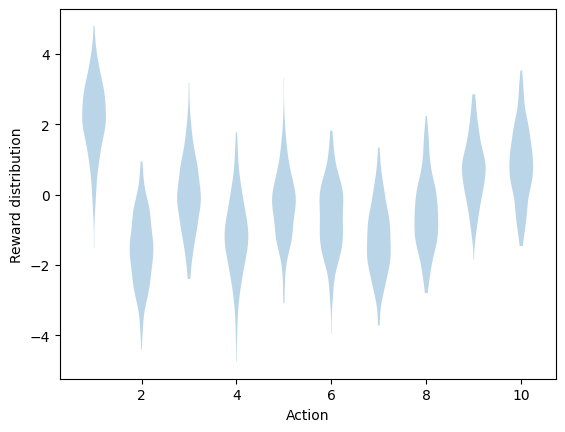

In [ ]:
n_samples = 200
k = 10


# Action-values
q = np.random.normal(0, 1, k)

# Rewards
R = np.random.normal(q.reshape(k, 1), 1, (k, n_samples))

plt.violinplot(dataset=R.T, showextrema=False, showmeans=False, points=200*k)
plt.xlabel("Action")
plt.ylabel("Reward distribution")
plt.show()

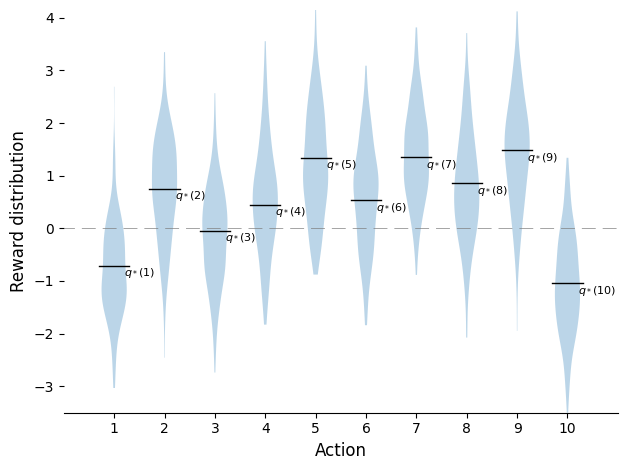

In [ ]:
np.random.seed(13)

# Generate Reward Data for k-armed bandit problem
def get_data(k, n_samples):
  # Action-values
  q = np.random.normal(0, 1, k)

  # Rewards
  R = np.random.normal(q.reshape(k, 1), 1, (k, n_samples))

  return q, R


def plot_testbed(q, R):
    plt.violinplot(dataset=R.T, showmeans=False, showextrema=False)

    # Draw mean marks for each action
    for i, mean in enumerate(q):
        idx = i + 1
        plt.plot([idx - 0.3, idx + 0.3], [mean, mean],
                 c='black',
                 linewidth=1)
        plt.text(idx + 0.2, mean - 0.2,
                 s=f"$q_*({idx})$",
                 fontsize=8)

    plt.plot(np.arange(0, 12), np.zeros(12),
             c='gray',
             linewidth=0.5,
             linestyle=(5, (20, 10)))

    plt.tick_params(axis='both', labelsize=10)
    plt.xticks(np.arange(1, 11))

    for i, spine in enumerate(plt.gca().spines.values()):
        if i == 2: continue
        spine.set_visible(False)

    label_font = {'fontsize': 12}
    plt.xlabel('Action', fontdict=label_font)
    plt.ylabel('Reward distribution', fontdict=label_font)
    plt.margins(0)

    plt.tight_layout()
    plt.show()


k = 10
n_samples = 200
q, R = get_data(k, n_samples)
plot_testbed(q, R)

### Figure 2.2

### Startegies to Solve the Multi-Armed Bandit Problem
1. Epislon Greedy
2. Upper Confidence Bound
3. Thompson Sampling?


### Epsilon-Greedy

- ```n_actions``` = number of actions (k)
- ```epislon``` = probability of exploration.
- ```Q``` = Estimated value of each action
- ```N``` = # of times each action is selected.
- ```Steps``` = Number of times an action will be selected
- ```q``` = true values of q
- ``` \alpha ``` = consta


Sample Average:

  New Estimate <-- StepSize [Target - OldEstimate]

Weighted Average:
- use of constant step size $\alpha$

$$ Q_{t+1} = Q_t + \alpha (R_t - Q_t) $$



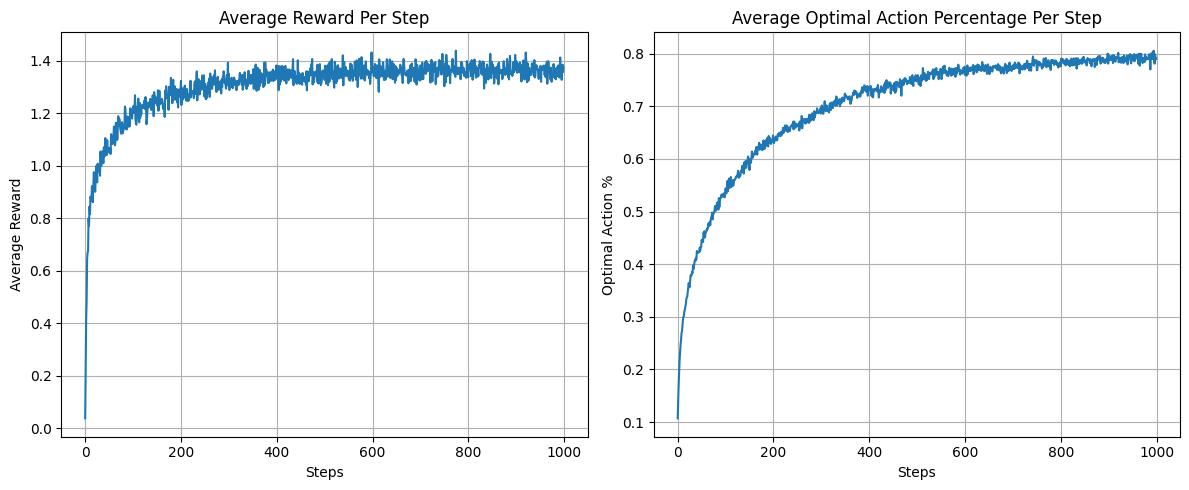

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(13)


# Bandit Algorithm
class Bandit:
  def __init__(self, K, epsilon):
    self.index = np.arange(K)
    self.epsilon = epsilon
    self.Q = np.zeros(K)
    self.N = np.zeros(K)
    self.q = np.random.normal(0, 1, K)


  def select(self):                         # -> index of action

    if np.random.rand() < self.epsilon:     # Exploration
      return np.random.choice(self.index)
    else:
        q_max = np.max(self.Q)
        candidates = np.flatnonzero(self.Q == q_max)
        return np.random.choice(candidates)

  # based on action selected, update values and return Reward
  def update(self, A):

    R = np.random.normal(self.q[A], 1)
    self.N[A] += 1
    self.Q[A] += (R - self.Q[A]) / self.N[A]

    return R


def simulate(k, steps, epsilon, runs):
    all_rewards = np.zeros((runs, steps))
    all_optimal_actions = np.zeros((runs, steps))

    for run in range(runs):
        bandit = Bandit(k, epsilon)
        optimal_action = np.argmax(bandit.q)

        for t in range(steps):
            action = bandit.select()
            reward = bandit.update(action)

            all_rewards[run, t] = reward
            all_optimal_actions[run, t] = 1 if action == optimal_action else 0

    average_rewards = np.mean(all_rewards, axis=0)
    average_optimal_action_percentages = np.mean(all_optimal_actions, axis=0)

    return average_rewards, average_optimal_action_percentages

k = 10
steps = 1000
epsilon = 0.1
runs = 2000  # Number of simulation runs

average_rewards, average_optimal_action_percentages = simulate(k, steps, epsilon, runs)

# Plotting the Average Rewards
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(average_rewards)
plt.title('Average Reward Per Step')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.grid(True)

# Plotting the Average Percentage of Optimal Actions
plt.subplot(1, 2, 2)
plt.plot(average_optimal_action_percentages)
plt.title('Average Optimal Action Percentage Per Step')
plt.xlabel('Steps')
plt.ylabel('Optimal Action %')
plt.grid(True)

plt.tight_layout()
plt.show()


### Handling multiple epislon

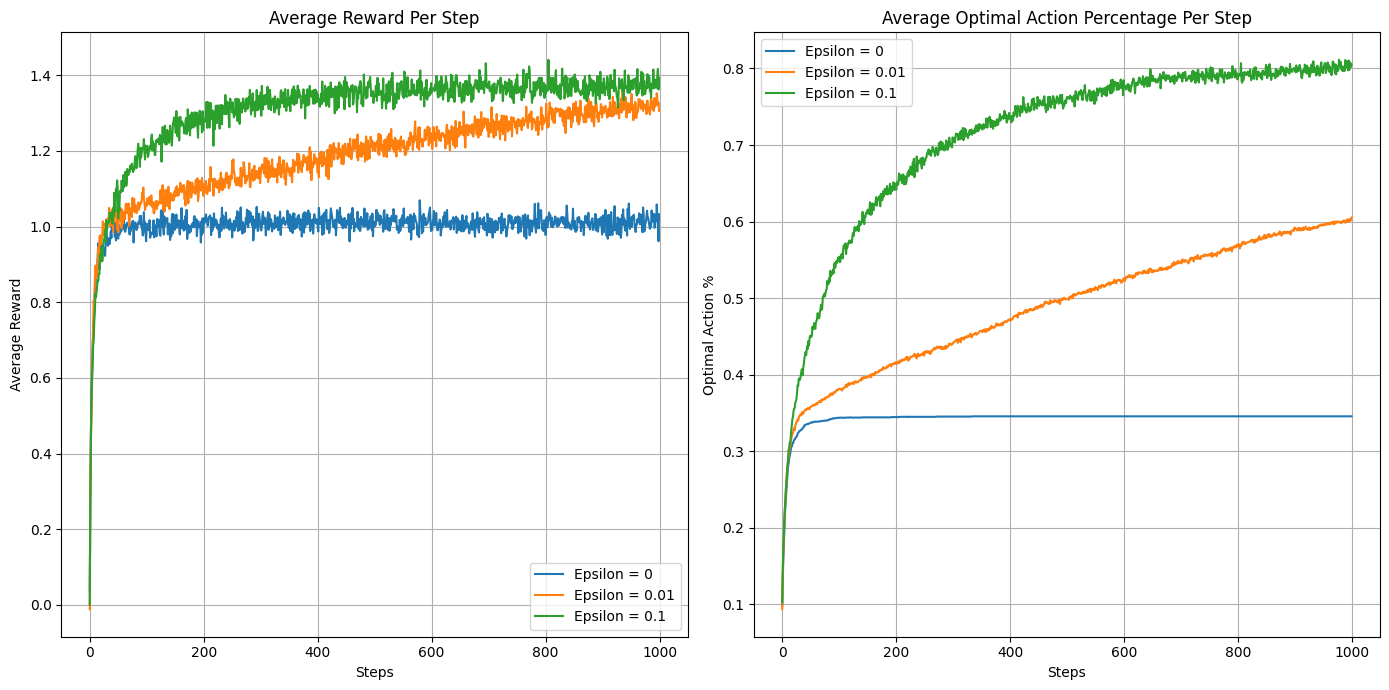

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(13)


# Bandit Algorithm
class Bandit:
  def __init__(self, K, epsilon):
    self.index = np.arange(K)
    self.epsilon = epsilon
    self.Q = np.zeros(K)
    self.N = np.zeros(K)
    self.q = np.random.normal(0, 1, K)


  def select(self):

    if np.random.rand() < self.epsilon:     # Exploration
      return np.random.choice(self.index)
    else:
        q_max = np.max(self.Q)
        candidates = np.flatnonzero(self.Q == q_max)
        return np.random.choice(candidates)

  # based on action selected, update values and return Reward
  def update(self, A):

    R = np.random.normal(self.q[A], 1)
    self.N[A] += 1
    self.Q[A] += (R - self.Q[A]) / self.N[A]

    return R


def simulate(k, steps, epsilons, runs):
    results = {}
    for epsilon in epsilons:
        all_rewards = np.zeros((runs, steps))
        all_optimal_actions = np.zeros((runs, steps))

        for run in range(runs):
            bandit = Bandit(k, epsilon)
            optimal_action = np.argmax(bandit.q)

            for t in range(steps):
                action = bandit.select()
                reward = bandit.update(action)

                all_rewards[run, t] = reward
                all_optimal_actions[run, t] = 1 if action == optimal_action else 0

        average_rewards = np.mean(all_rewards, axis=0)
        average_optimal_action_percentages = np.mean(all_optimal_actions, axis=0)

        results[epsilon] = (average_rewards, average_optimal_action_percentages)

    return results

k = 10
steps = 1000
epsilons = [0, 0.01, 0.1]
runs = 3000

results = simulate(k, steps, epsilons, runs)

# Plotting the results
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
for epsilon, (avg_rewards, _) in results.items():
    plt.plot(avg_rewards, label=f'Epsilon = {epsilon}')
plt.title('Average Reward Per Step')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for epsilon, (_, avg_optimal_actions) in results.items():
    plt.plot(avg_optimal_actions, label=f'Epsilon = {epsilon}')
plt.title('Average Optimal Action Percentage Per Step')
plt.xlabel('Steps')
plt.ylabel('Optimal Action %')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Non-Stationary

1. Initialize true true (means) of actions every action to zero  $ q_{*} $
2. After each simulation update $ q_{*} $ by adding a random sample from a Gaussain distirbution with mean zero, std = 0.01 at each step
  - will likely have to use some sort of temp storage type


- ```irw``` - independent random walk

### Independent Random Walks

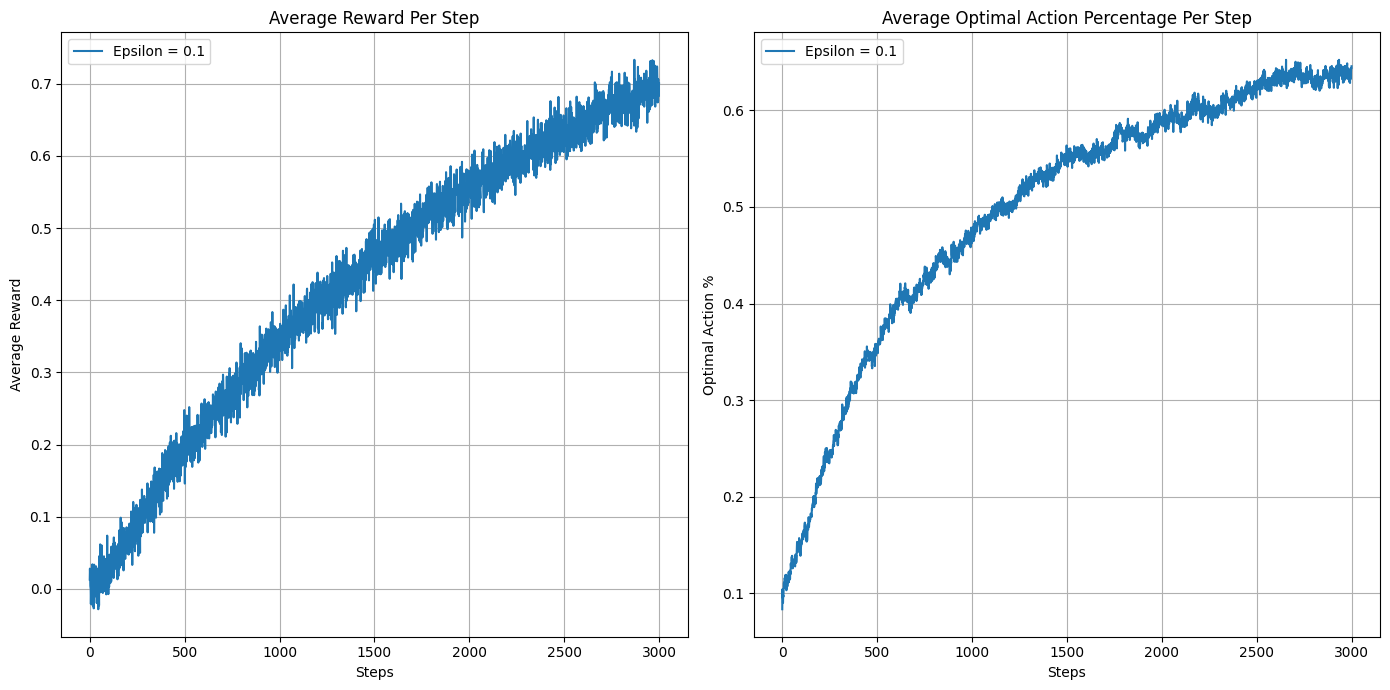

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(13)


# Bandit Algorithm
class Bandit:
  def __init__(self, K, epsilon, alpha):
    self.K = K
    self.index = np.arange(K)
    self.epsilon = epsilon
    self.Q = np.zeros(K)
    self.N = np.zeros(K)
    self.q = np.zeros(K)
    self.alpha = alpha


  def select(self):

    self.q += np.random.normal(0, 0.01, self.K)

    if np.random.rand() < self.epsilon:
      return np.random.choice(self.index)
    else:
        q_max = np.max(self.Q)
        candidates = np.flatnonzero(self.Q == q_max)
        return np.random.choice(candidates)

  # based on action selected, update values and return Reward
  def update(self, A):

    R = np.random.normal(self.q[A], 1)

    self.N[A] += 1
    self.Q[A] += self.alpha * (R - self.Q[A])

    A_optimal = np.argmax(self.q)
    return R, A_optimal


def simulate(k, steps, epsilons, runs, simulate):
    results = {}
    for epsilon in epsilons:
        all_rewards = np.zeros((runs, steps))
        all_optimal_actions = np.zeros((runs, steps))

        for run in range(runs):
            bandit = Bandit(k, epsilon, alpha)

            for t in range(steps):
                action = bandit.select()
                reward, A_optimal = bandit.update(action)

                all_rewards[run, t] = reward
                all_optimal_actions[run, t] = 1 if action == A_optimal else 0

        average_rewards = np.mean(all_rewards, axis=0)
        average_optimal_action_percentages = np.mean(all_optimal_actions, axis=0)

        results[epsilon] = (average_rewards, average_optimal_action_percentages)

    return results

k = 10
steps = 10000
epsilons = [0.1]
runs = 3000
alpha = 0.1

results = simulate(k, steps, epsilons, runs, alpha)

# Plotting the results
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
for epsilon, (avg_rewards, _) in results.items():
    plt.plot(avg_rewards, label=f'Epsilon = {epsilon}')
plt.title('Average Reward Per Step')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for epsilon, (_, avg_optimal_actions) in results.items():
    plt.plot(avg_optimal_actions, label=f'Epsilon = {epsilon}')
plt.title('Average Optimal Action Percentage Per Step')
plt.xlabel('Steps')
plt.ylabel('Optimal Action %')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### IRW: False

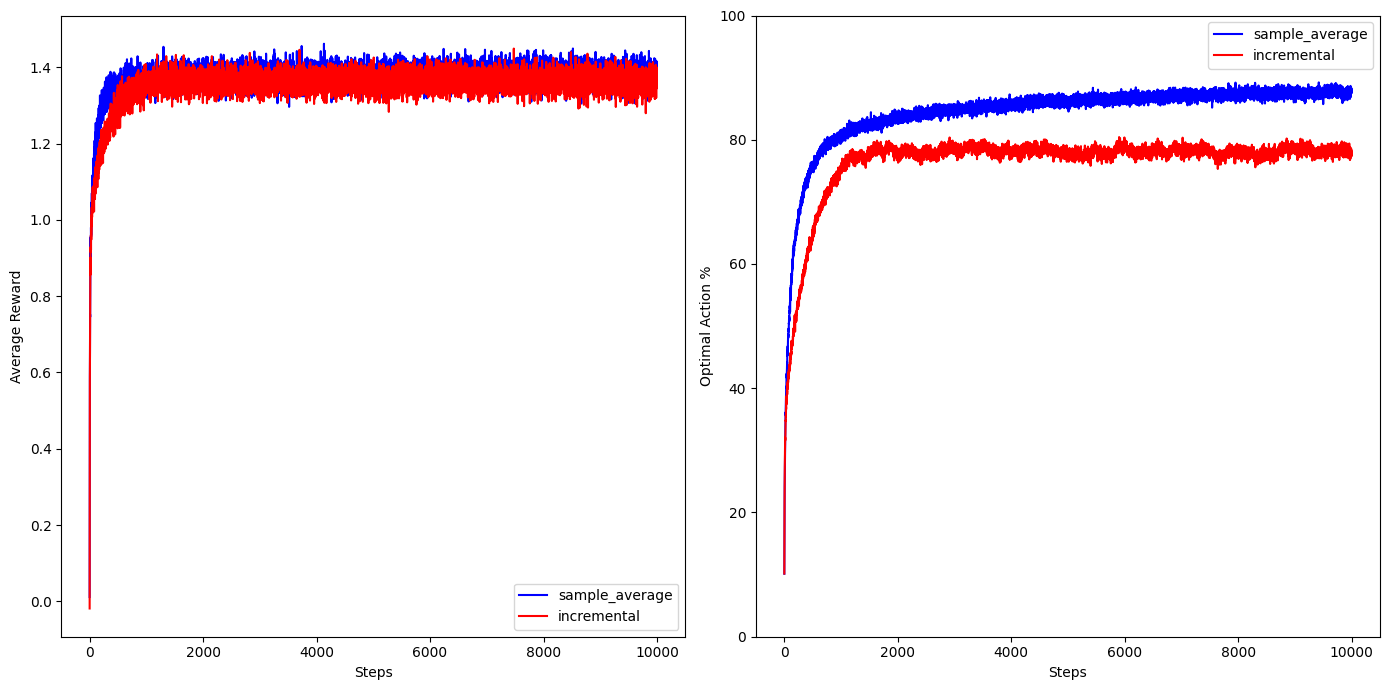

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(13)

class Bandit:
    def __init__(self, K, epsilon, alpha, method):
        self.K = K
        self.index = np.arange(K)
        self.epsilon = epsilon
        self.Q = np.zeros(K)
        self.N = np.zeros(K)
        self.q = np.random.normal(0, 1, K)
        self.method = method
        self.alpha = alpha

    def select(self):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.index)
        else:
            q_max = np.max(self.Q)
            candidates = np.flatnonzero(self.Q == q_max)
            return np.random.choice(candidates)

    def update(self, A):
        R = np.random.normal(self.q[A], 1)
        self.N[A] += 1
        if self.method == 'sample_average':
            self.Q[A] += (R - self.Q[A]) / self.N[A]
        elif self.method == 'incremental':
            self.Q[A] += self.alpha * (R - self.Q[A])
        return R

def simulate(k, steps, epsilon, runs, alpha, methods):
    results = {}
    for method in methods:
        all_rewards = np.zeros((runs, steps))
        all_optimal_actions = np.zeros((runs, steps))

        for run in range(runs):
            bandit = Bandit(k, epsilon, alpha, method)
            optimal_action = np.argmax(bandit.q)

            for t in range(steps):
                action = bandit.select()
                reward = bandit.update(action)

                all_rewards[run, t] = reward
                all_optimal_actions[run, t] = 1 if action == optimal_action else 0

        average_rewards = np.mean(all_rewards, axis=0)
        average_optimal_action_percentages = np.mean(all_optimal_actions, axis=0) * 100

        results[method] = (average_rewards, average_optimal_action_percentages)

    return results

# Configuration
k = 10
steps = 10000
epsilon = 0.1
runs = 3000
alpha = 0.1
methods = ['sample_average', 'incremental']

results = simulate(k, steps, epsilon, runs, alpha, methods)

# Plotting the results
plt.figure(figsize=(14, 7))
colors = {'sample_average': '#0000FF', 'incremental': '#FF0000'}

plt.subplot(1, 2, 1)
for method, (avg_rewards, _) in results.items():
    plt.plot(avg_rewards, label=f'{method}', color=colors[method])
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()

plt.subplot(1, 2, 2)
for method, (_, avg_optimal_actions) in results.items():
    plt.plot(avg_optimal_actions, label=f'{method}', color=colors[method])
plt.xlabel('Steps')
plt.ylabel('Optimal Action %')
plt.yticks(np.arange(0, 101, 20))
plt.legend()

plt.tight_layout()
plt.show()

### IRW: True

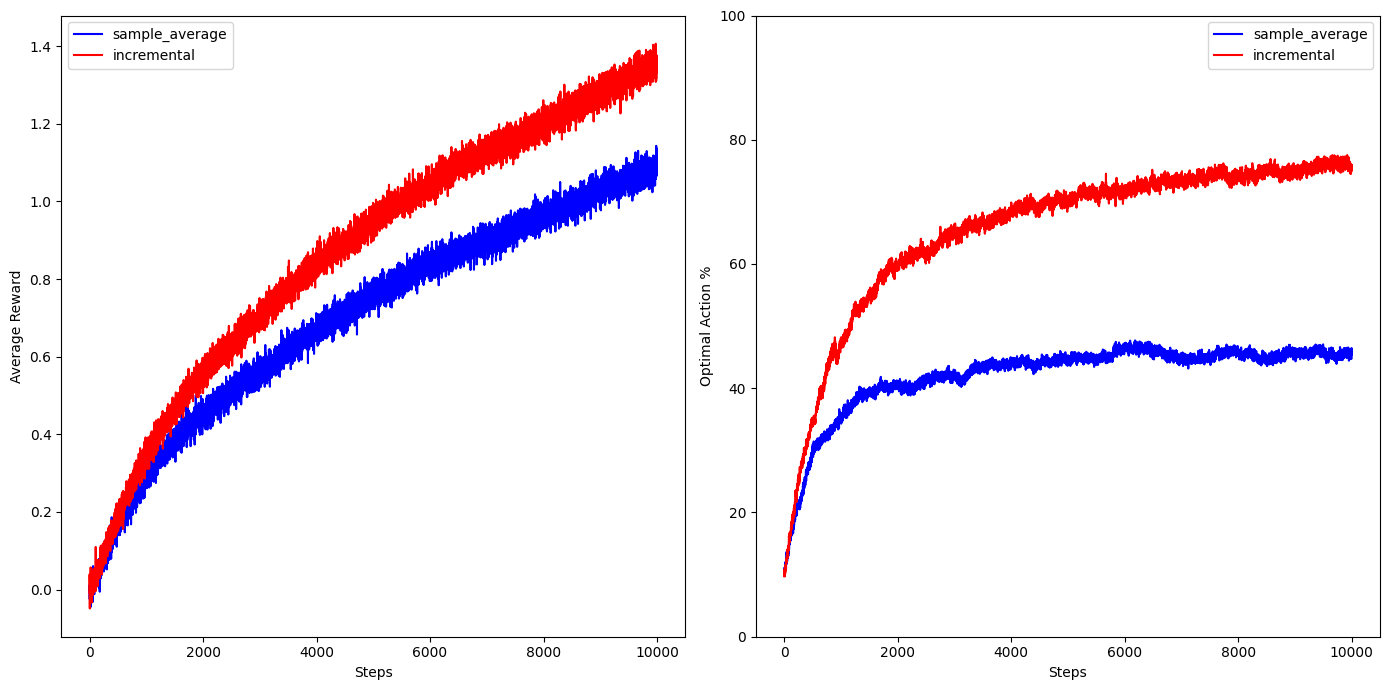

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(13)

class Bandit:
    def __init__(self, K, epsilon, alpha, method):
        self.K = K
        self.index = np.arange(K)
        self.epsilon = epsilon
        self.Q = np.zeros(K)
        self.N = np.zeros(K)
        self.q = np.zeros(K)
        self.alpha = alpha
        self.method = method

    def select(self):
        self.q += np.random.normal(0, 0.01, self.K)
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.index)
        else:
            q_max = np.max(self.Q)
            candidates = np.flatnonzero(self.Q == q_max)
            return np.random.choice(candidates)

    def update(self, A):
        R = np.random.normal(self.q[A], 1)
        self.N[A] += 1
        if self.method == 'sample_average':
            self.Q[A] = self.Q[A] + (R - self.Q[A]) / self.N[A]
        elif self.method == 'incremental':
            self.Q[A] += self.alpha * (R - self.Q[A])
        return R, np.argmax(self.q)

def simulate(k, steps, epsilon, runs, alpha, methods):
    results = {}
    for method in methods:
        all_rewards = np.zeros((runs, steps))
        all_optimal_actions = np.zeros((runs, steps))

        for run in range(runs):
            bandit = Bandit(k, epsilon, alpha, method)
            for t in range(steps):
                action = bandit.select()
                reward, A_optimal = bandit.update(action)

                all_rewards[run, t] = reward
                all_optimal_actions[run, t] = 1 if action == A_optimal else 0

        average_rewards = np.mean(all_rewards, axis=0)
        average_optimal_action_percentages = np.mean(all_optimal_actions, axis=0) * 100
        results[method] = (average_rewards, average_optimal_action_percentages)

    return results

# Configuration
k = 10
steps = 10000
epsilon = 0.1
runs = 3000
alpha = 0.1
methods = ['sample_average', 'incremental']

results = simulate(k, steps, epsilon, runs, alpha, methods)

# Plotting the results
plt.figure(figsize=(14, 7))
colors = {'sample_average': '#0000FF', 'incremental': '#FF0000'}

plt.subplot(1, 2, 1)
for method, (avg_rewards, _) in results.items():
    plt.plot(avg_rewards, label=f'{method}', color=colors[method])
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()

plt.subplot(1, 2, 2)
for method, (_, avg_optimal_actions) in results.items():
    plt.plot(avg_optimal_actions, label=f'{method}', color=colors[method])
plt.xlabel('Steps')
plt.ylabel('Optimal Action %')
plt.yticks(np.arange(0, 101, 20))
plt.legend()

plt.tight_layout()
plt.show()


## Vectorization

#### irw: false

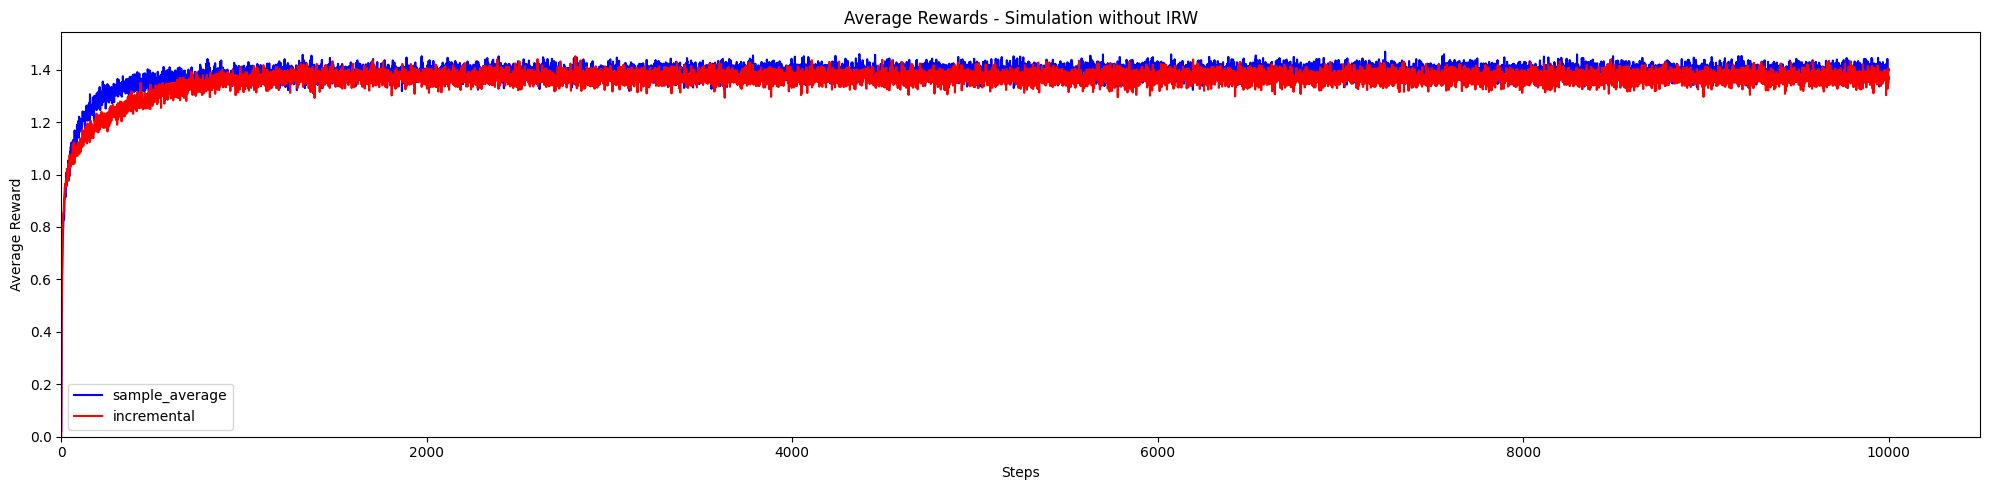

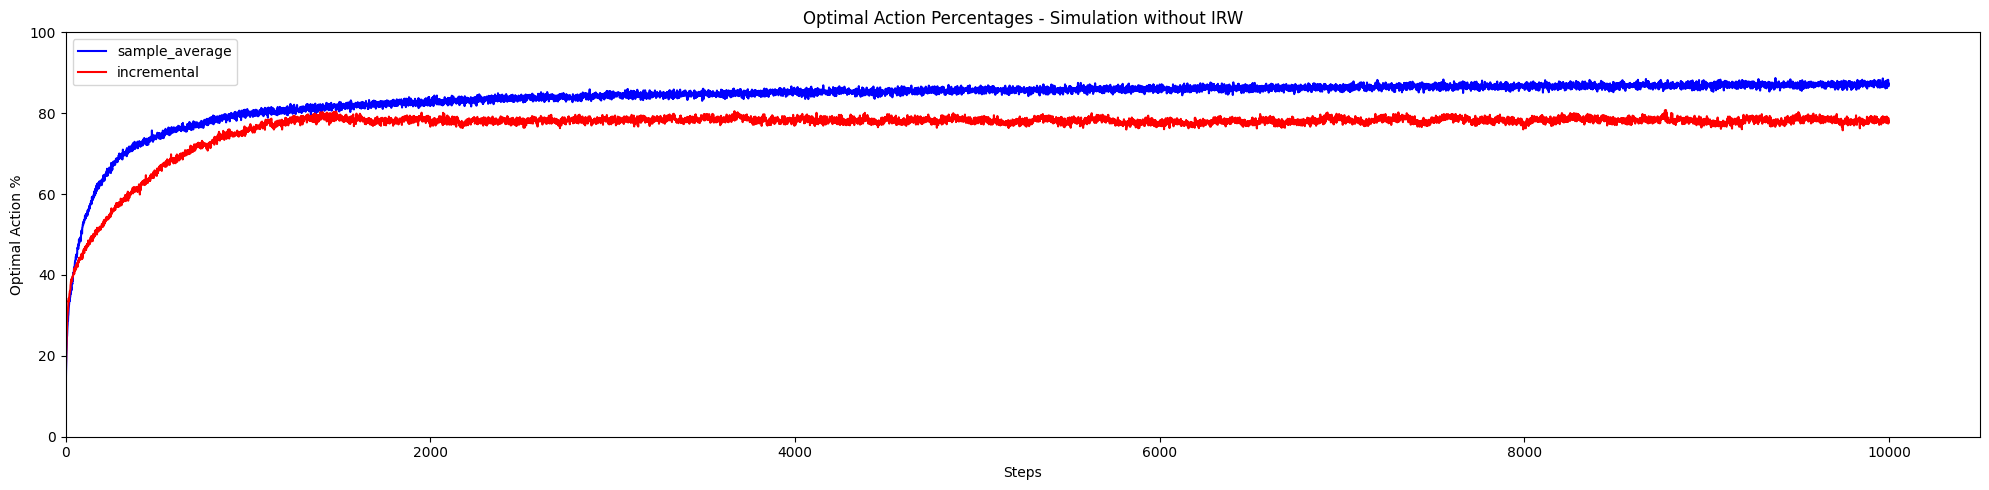

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(13)

class ConfigManager:
    def __init__(self, K, steps, epsilon, runs, alpha, methods):
        self.K = K
        self.steps = steps
        self.epsilon = epsilon
        self.runs = runs
        self.alpha = alpha
        self.methods = methods

class Bandit:
    def __init__(self, config):
        self.K = config.K
        self.epsilon = config.epsilon
        self.Q = np.zeros((config.runs, self.K))
        self.N = np.zeros((config.runs, self.K))
        self.q = np.random.normal(0, 1, (config.runs, self.K))
        self.method = config.method
        self.alpha = config.alpha
        self.runs = config.runs

    def select(self):
        random_draws = np.random.rand(self.runs, 1)
        random_actions = np.random.randint(0, self.K, (self.runs, 1))
        best_actions = np.argmax(self.Q, axis=1).reshape(-1, 1)
        return np.where(random_draws < self.epsilon, random_actions, best_actions)

    def update(self, actions):
        range_runs = np.arange(self.runs)
        chosen_q_values = self.q[range_runs, actions.flatten()]
        rewards = np.random.normal(chosen_q_values, 1)
        self.N[range_runs, actions.flatten()] += 1
        if self.method == 'sample_average':
            self.Q[range_runs, actions.flatten()] += (rewards - self.Q[range_runs, actions.flatten()]) / self.N[range_runs, actions.flatten()]
        elif self.method == 'incremental':
            self.Q[range_runs, actions.flatten()] += self.alpha * (rewards - self.Q[range_runs, actions.flatten()])
        return rewards

class Simulation:
    def __init__(self, config):
        self.config = config

    def run(self):
        results = {}
        for method in self.config.methods:
            self.config.method = method
            bandit = Bandit(self.config)
            optimal_actions = np.argmax(bandit.q, axis=1)

            all_rewards = np.zeros((self.config.runs, self.config.steps))
            all_optimal_actions = np.zeros((self.config.runs, self.config.steps))

            for t in range(self.config.steps):
                actions = bandit.select()
                rewards = bandit.update(actions)
                all_rewards[:, t] = rewards
                optimal_action_mask = actions.flatten() == optimal_actions
                all_optimal_actions[:, t] = optimal_action_mask

            average_rewards = np.mean(all_rewards, axis=0)
            average_optimal_action_percentages = np.mean(all_optimal_actions, axis=0) * 100
            results[method] = (average_rewards, average_optimal_action_percentages)
        return results

def plot_results(results, colors, title_suffix):
    plt.figure(figsize=(20, 5))
    for method, (avg_rewards, _) in results.items():
        plt.plot(avg_rewards, label=method, color=colors[method])
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.title(f"Average Rewards - {title_suffix}")
    plt.legend()
    plt.ylim(bottom=0)
    plt.xlim(left=0)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(20, 5))
    for method, (_, avg_optimal_actions) in results.items():
        plt.plot(avg_optimal_actions, label=method, color=colors[method])
    plt.xlabel('Steps')
    plt.ylabel('Optimal Action %')
    plt.yticks(np.arange(0, 101, 20))
    plt.title(f"Optimal Action Percentages - {title_suffix}")
    plt.legend()
    plt.ylim(bottom=0)
    plt.xlim(left=0)
    plt.tight_layout()
    plt.show()


# Configuration for the simulation
config = ConfigManager(K=10, steps=10000, epsilon=0.1, runs=3000, alpha=0.1, methods=['sample_average', 'incremental'])

# Running the simulation
simulation = Simulation(config)
results = simulation.run()

# Colors for plotting
colors = {'sample_average': '#0000FF', 'incremental': '#FF0000'}

# Plotting the results using the revised plot function
plot_results(results, colors, "Simulation without IRW")

#### irw: true



*   change incremental to constant step-size
*   add irw: true false for each run



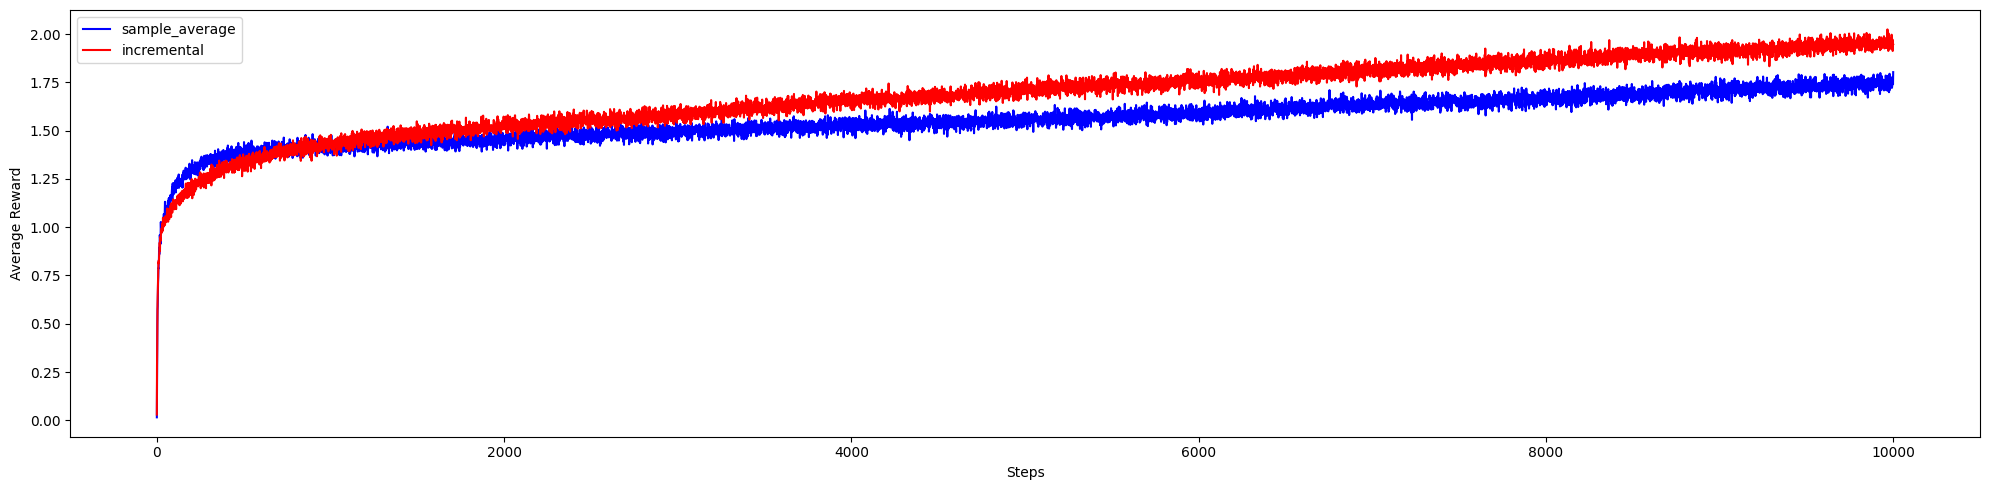

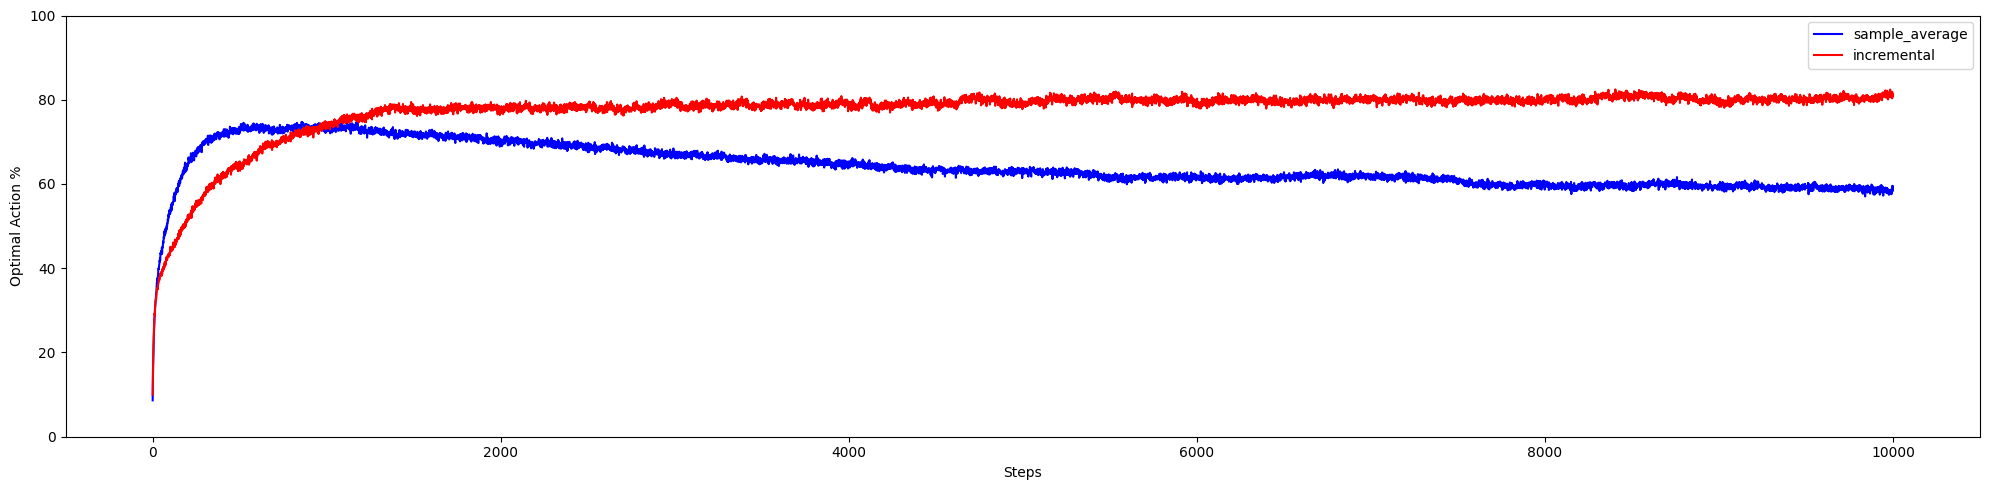

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(13)

class ConfigManager:
    def __init__(self, K, steps, epsilon, runs, alpha, methods):
        self.K = K
        self.steps = steps
        self.epsilon = epsilon
        self.runs = runs
        self.alpha = alpha
        self.methods = methods

class Bandit:
    def __init__(self, config):
        self.K = config.K
        self.epsilon = config.epsilon
        self.Q = np.zeros((config.runs, self.K))
        self.N = np.zeros((config.runs, self.K))
        self.q = np.random.normal(0, 1, (config.runs, self.K))
        self.alpha = config.alpha
        self.runs = config.runs
        self.method = config.method

    def select(self):
        self.q += np.random.normal(0, 0.01, (self.runs, self.K))
        random_draws = np.random.rand(self.runs, 1)
        random_actions = np.random.randint(0, self.K, (self.runs, 1))
        q_max = np.max(self.Q, axis=1).reshape(-1, 1)
        best_actions = np.argmax(self.Q, axis=1).reshape(-1, 1)
        return np.where(random_draws < self.epsilon, random_actions, best_actions)

    def update(self, actions):
        range_runs = np.arange(self.runs)
        chosen_q_values = self.q[range_runs, actions.flatten()]
        rewards = np.random.normal(chosen_q_values, 1)
        self.N[range_runs, actions.flatten()] += 1
        if self.method == 'sample_average':
            self.Q[range_runs, actions.flatten()] += (rewards - self.Q[range_runs, actions.flatten()]) / self.N[range_runs, actions.flatten()]
        elif self.method == 'incremental':
            self.Q[range_runs, actions.flatten()] += self.alpha * (rewards - self.Q[range_runs, actions.flatten()])
        optimal_actions = np.argmax(self.q, axis=1)
        optimal_action_mask = actions == optimal_actions.reshape(-1, 1)
        return rewards, optimal_action_mask

class Simulation:
    def __init__(self, config):
        self.config = config

    def run(self):
        results = {}
        for method in self.config.methods:
            self.config.method = method
            bandit = Bandit(self.config)

            all_rewards = np.zeros((self.config.runs, self.config.steps))
            all_optimal_actions = np.zeros((self.config.runs, self.config.steps))

            for t in range(self.config.steps):
                actions = bandit.select()
                rewards, optimal_action_mask = bandit.update(actions)
                all_rewards[:, t] = rewards
                all_optimal_actions[:, t] = optimal_action_mask.flatten()

            average_rewards = np.mean(all_rewards, axis=0)
            average_optimal_action_percentages = np.mean(all_optimal_actions, axis=0) * 100
            results[method] = (average_rewards, average_optimal_action_percentages)

        return results

def plot_results(results, colors, title_suffix):
    plt.figure(figsize=(20, 5))
    for method, (avg_rewards, _) in results.items():
        plt.plot(avg_rewards, label=method, color=colors[method])
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.title(f"Average Rewards - {title_suffix}")
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(20, 5))
    for method, (_, avg_optimal_actions) in results.items():
        plt.plot(avg_optimal_actions, label=method, color=colors[method])
    plt.xlabel('Steps')
    plt.ylabel('Optimal Action %')
    plt.yticks(np.arange(0, 101, 20))
    plt.title(f"Optimal Action Percentages - {title_suffix}")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Usage:
config = ConfigManager(K=10, steps=10000, epsilon=0.1, runs=3000, alpha=0.1, methods=['sample_average', 'incremental'])
simulation = Simulation(config)
results = simulation.run()
colors = {'sample_average': '#0000FF', 'incremental': '#FF0000'}
plot_results(results, colors, "irw: true")

### Final

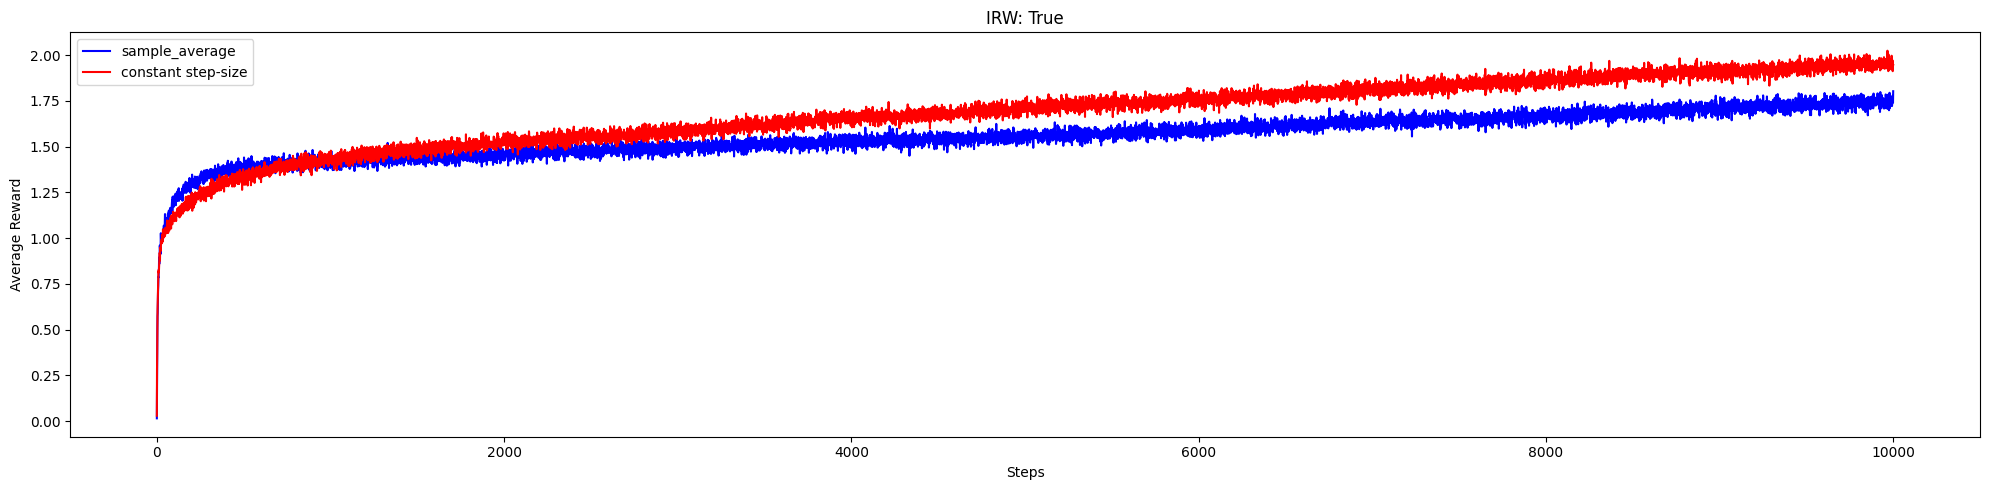

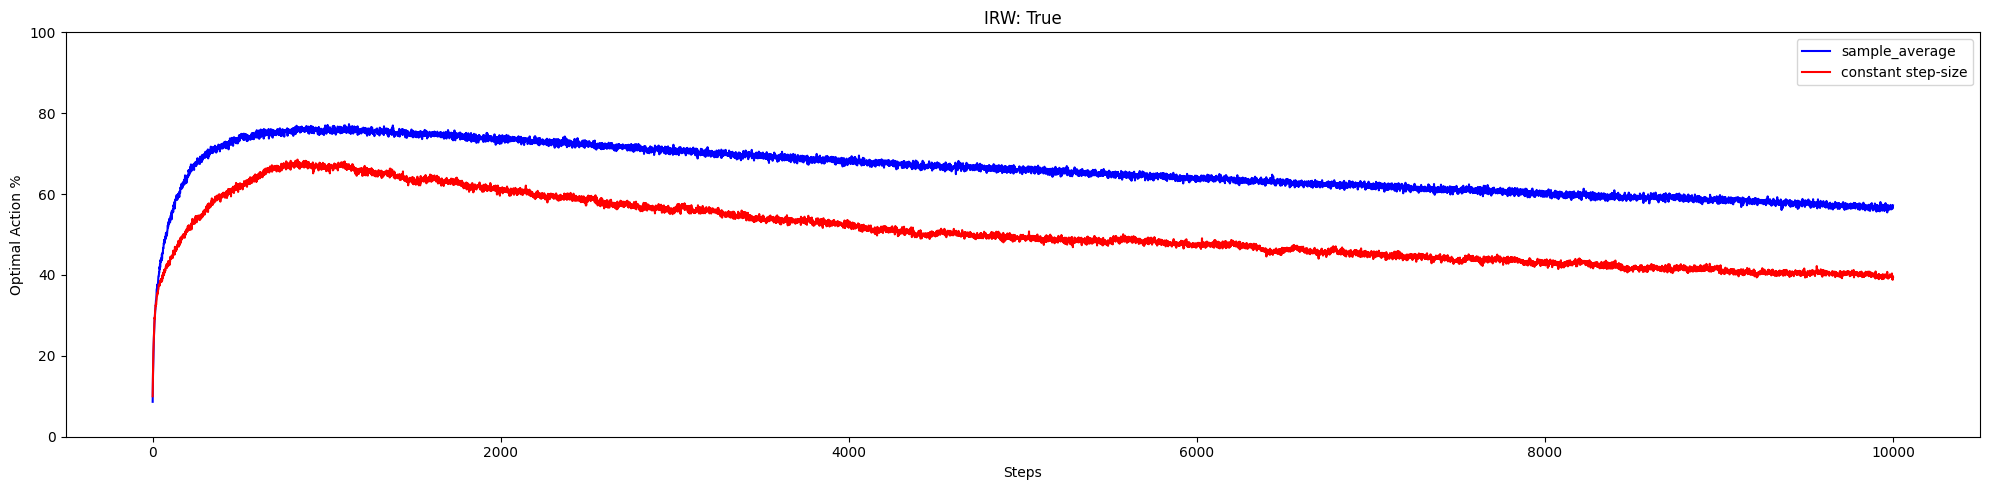

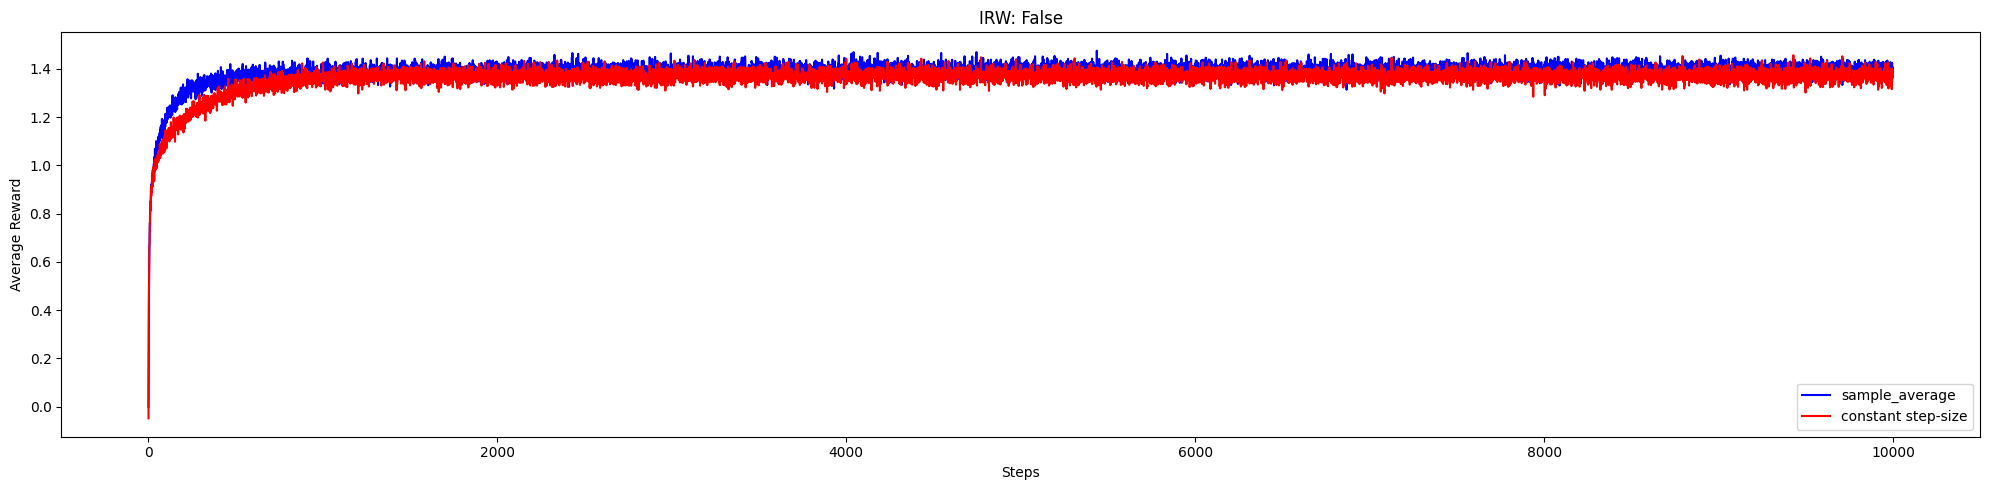

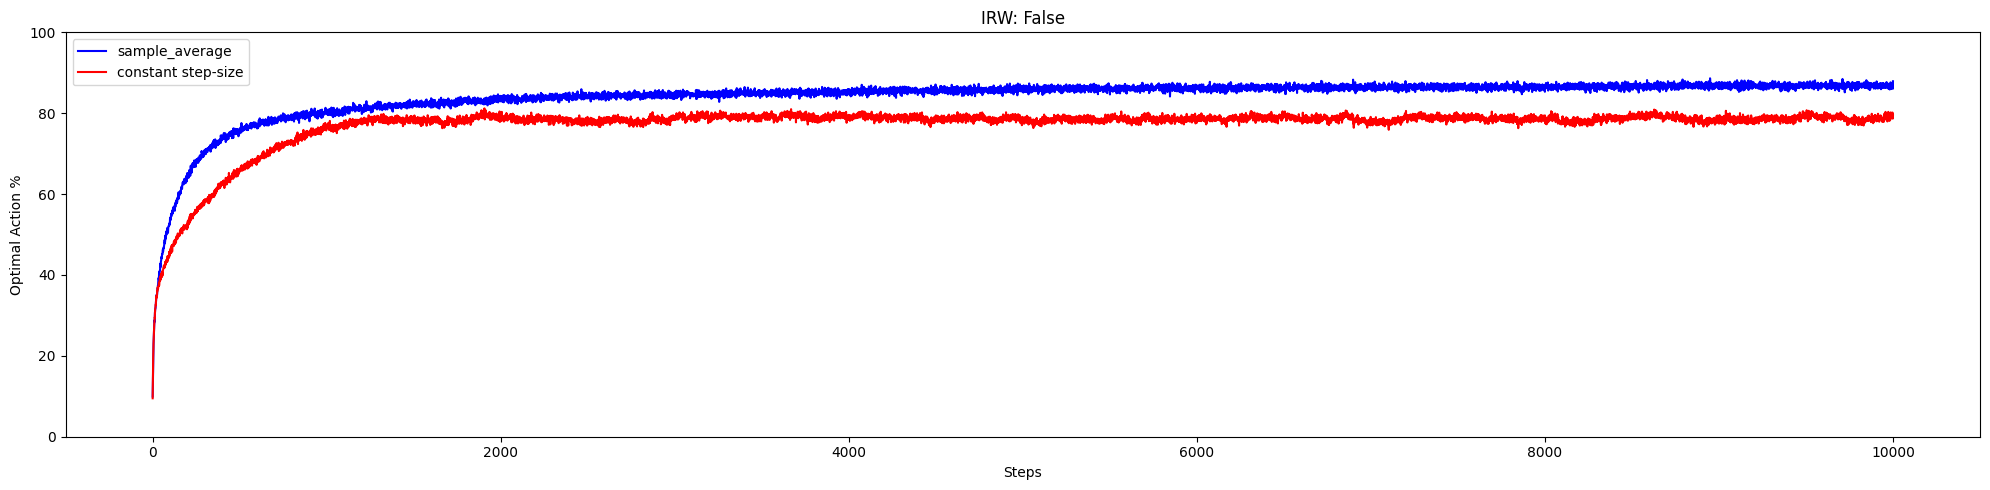

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(13)


class ConfigManager:
    def __init__(self, K, steps, epsilon, runs, alpha, methods, irw=False):
        self.K = K
        self.steps = steps
        self.epsilon = epsilon
        self.runs = runs
        self.alpha = alpha
        self.methods = methods
        self.irw = irw


class Bandit:
    def __init__(self, config):
        self.K = config.K
        self.epsilon = config.epsilon
        self.Q = np.zeros((config.runs, self.K))
        self.N = np.zeros((config.runs, self.K))
        self.q = np.random.normal(0, 1, (config.runs, self.K))
        self.alpha = config.alpha
        self.runs = config.runs
        self.method = config.method
        self.irw = config.irw

    def select(self):
        if self.irw:
            self.q += np.random.normal(0, 0.01, (self.runs, self.K))
        random_draws = np.random.rand(self.runs, 1)
        random_actions = np.random.randint(0, self.K, (self.runs, 1))
        best_actions = np.argmax(self.Q, axis=1).reshape(-1, 1)
        return np.where(random_draws < self.epsilon, random_actions, best_actions)

    def update(self, actions):
        range_runs = np.arange(self.runs)
        chosen_q_values = self.q[range_runs, actions.flatten()]
        rewards = np.random.normal(chosen_q_values, 1)
        self.N[range_runs, actions.flatten()] += 1
        if self.method == "sample_average":
            self.Q[range_runs, actions.flatten()] += (
                rewards - self.Q[range_runs, actions.flatten()]
            ) / self.N[range_runs, actions.flatten()]
        elif self.method == "constant step-size":
            self.Q[range_runs, actions.flatten()] += self.alpha * (
                rewards - self.Q[range_runs, actions.flatten()]
            )
        return rewards


class Simulation:
    def __init__(self, config):
        self.config = config

    def run(self):
        results = {}
        for method in self.config.methods:
            self.config.method = method
            bandit = Bandit(self.config)
            optimal_actions = np.argmax(bandit.q, axis=1)

            all_rewards = np.zeros((self.config.runs, self.config.steps))
            all_optimal_actions = np.zeros((self.config.runs, self.config.steps))

            for t in range(self.config.steps):
                actions = bandit.select()
                rewards = bandit.update(actions)
                all_rewards[:, t] = rewards
                optimal_action_mask = actions.flatten() == optimal_actions
                all_optimal_actions[:, t] = optimal_action_mask

            average_rewards = np.mean(all_rewards, axis=0)
            average_optimal_action_percentages = (
                np.mean(all_optimal_actions, axis=0) * 100
            )
            results[method] = (average_rewards, average_optimal_action_percentages)
        return results


def plot_results(results, title_suffix):
    colors = {"sample_average": "#0000FF", "constant step-size": "#FF0000"}
    plt.figure(figsize=(20, 5))
    for method, (avg_rewards, _) in results.items():
        plt.plot(avg_rewards, label=method, color=colors[method])
    plt.xlabel("Steps")
    plt.ylabel("Average Reward")
    plt.title(title_suffix)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(20, 5))
    for method, (_, avg_optimal_actions) in results.items():
        plt.plot(avg_optimal_actions, label=method, color=colors[method])
    plt.xlabel("Steps")
    plt.ylabel("Optimal Action %")
    plt.yticks(np.arange(0, 101, 20))
    plt.title(title_suffix)
    plt.legend()
    plt.tight_layout()
    plt.show()


def main():
    # Configurations for simulations
    irw = ConfigManager(
        K=10,
        steps=10000,
        epsilon=0.1,
        runs=3000,
        alpha=0.1,
        methods=["sample_average", "constant step-size"],
        irw=True,
    )
    non_irw = ConfigManager(
        K=10,
        steps=10000,
        epsilon=0.1,
        runs=3000,
        alpha=0.1,
        methods=["sample_average", "constant step-size"],
        irw=False,
    )

    # Run simulations
    simulation_irw = Simulation(irw)
    results_irw = simulation_irw.run()
    simulation_non_irw = Simulation(non_irw)
    results_non_irw = simulation_non_irw.run()

    plot_results(results_irw, "IRW: True")
    plot_results(results_non_irw, "IRW: False")


if __name__ == "__main__":
    main()


### What's this Matrix Buisiness

In [ ]:
import numpy as np

# Simulate some toy data
np.random.seed(42)
runs = 5  # Simulate 5 runs
K = 3  # 3 possible actions (arms)

# Randomly generated q-values for each run (5 runs, 3 actions per run)
q_values = np.random.normal(0, 1, (runs, K))
print("Initial q-values (runs, actions):")
print(q_values)

# Step 1: Best actions based on q-values
best_actions = np.argmax(q_values, axis=1)  # Best action per run (1D array)
print("\nBest actions (1D):")
print(best_actions)

# Reshape best actions to a 2D array (to simulate (runs, 1))
best_actions_reshaped = best_actions.reshape(-1, 1)
print("\nBest actions reshaped (runs, 1):")
print(best_actions_reshaped)

# Step 2: Simulating action selection
# Let's say we have randomly chosen actions for each run (in a 2D array)
random_actions = np.random.randint(0, K, (runs, 1))
print("\nRandom actions (runs, 1):")
print(random_actions)

# Step 3: Choose between random actions and best actions based on some condition
# For simplicity, let's simulate a condition where we use random_actions for runs with an even index
chosen_actions = np.where(np.arange(runs).reshape(-1, 1) % 2 == 0, random_actions, best_actions_reshaped)
print("\nChosen actions (runs, 1):")
print(chosen_actions)

# Step 4: Flatten the chosen actions to index into q-values
chosen_actions_flattened = chosen_actions.flatten()
print("\nChosen actions flattened (1D):")
print(chosen_actions_flattened)

# Step 5: Extract q-values for the chosen actions
range_runs = np.arange(runs)
chosen_q_values = q_values[range_runs, chosen_actions_flattened]
print("\nQ-values for chosen actions (per run):")
print(chosen_q_values)


Initial q-values (runs, actions):
[[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]
 [ 1.57921282  0.76743473 -0.46947439]
 [ 0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783]]

Best actions (1D):
[2 0 0 0 0]

Best actions reshaped (runs, 1):
[[2]
 [0]
 [0]
 [0]
 [0]]

Random actions (runs, 1):
[[2]
 [2]
 [1]
 [2]
 [1]]

Chosen actions (runs, 1):
[[2]
 [0]
 [1]
 [0]
 [1]]

Chosen actions flattened (1D):
[2 0 1 0 1]

Q-values for chosen actions (per run):
[ 0.64768854  1.52302986  0.76743473  0.54256004 -1.91328024]


#### np.argmax()

* axis parameter


Interestingly, by default argmax will flatten a matrix it will return the index of the largest integer.



In [ ]:
import numpy as np

# Simulate some toy data
np.random.seed(42)
runs = 5  # Simulate 5 runs
K = 3  # 3 possible actions (arms)

# Randomly generated q-values for each run (5 runs, 3 actions per run)
q_values = np.random.normal(0, 1, (runs, K))
print("Initial q-values (runs, actions):")
print(q_values)

# Step 1: Best actions based on q-values
best_actions = np.argmax(q_values)  # Best action per run (1D array)
print("\nBest actions (1D):")
print(best_actions)


Initial q-values (runs, actions):
[[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]
 [ 1.57921282  0.76743473 -0.46947439]
 [ 0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783]]

Best actions (1D):
6


#### Reshape

*

In [ ]:
import numpy as np

a = np.arange(6)
print(a)
a_1 = np.reshape(a, (2, 3))


a_3 = np.reshape(a, (-1,1))
print(a_3)


a_4 = a_3.flatten()
print(a_4)

a_2 = a_3.reshape(1, -1)
print(a_2)


[0 1 2 3 4 5]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]
[0 1 2 3 4 5]
[[0 1 2 3 4 5]]


In [ ]:
b = np.arange(8)
print(b)

b_1 = b.reshape(2,2,2)
print(b_1)


b_2 = b_1.reshape(-1, 1)
print(b_2)

[0 1 2 3 4 5 6 7]
[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]]


In [ ]:
import numpy as np

a = np.array([[1], [2], [3]])  # This is a column vector with shape (3, 1)
print("Shape of a:", a.shape)

print


# Flatten the array
a_f = a.flatten()
print("Shape of flattened a:", a_f.shape)



# Reshape the column vector into a row vector
reshaped_a = np.reshape(a, (1, -1))
print("Shape of reshaped a:", reshaped_a.shape)

Shape of a: (3, 1)
Shape of flattened a: (3,)
Shape of reshaped a: (1, 3)


In [ ]:
import numpy as np

a = np.array([[1], [2], [3]])  # This is a column vector with shape (3, 1)
print("Shape of a:", a.shape)

print(a.shape)


b = a.flatten()
print(b)

print(b.shape)

Shape of a: (3, 1)
(3, 1)
[1 2 3]
(3,)


why do we have (D,) arrays when we flatten an array with D elements? wouldn't this be 3 rows by no columns?

In [ ]:
import numpy as np

# Simulate some toy data
np.random.seed(42)
runs = 5  # Simulate 5 runs
K = 3  # 3 possible actions (arms)

# Randomly generated q-values for each run (5 runs, 3 actions per run)
q_values = np.random.normal(0, 1, (runs, K))
print("Initial q-values (runs, actions):")
print(q_values)

# Step 1: Best actions based on q-values
best_actions = np.argmax(q_values, axis=1)  # Best action per run (1D array)
print("\nBest actions (1D):")
print(best_actions)

# Reshape best actions to a 2D array (to simulate (runs, 1))
best_actions_reshaped = best_actions.reshape(-1, 1)
print("\nBest actions reshaped (runs, 1):")
print(best_actions_reshaped)

# Step 2: Simulating action selection
# Let's say we have randomly chosen actions for each run (in a 2D array)
random_actions = np.random.randint(0, K, (runs, 1))
print("\nRandom actions (runs, 1):")
print(random_actions)

# Step 3: Choose between random actions and best actions based on some condition
# For simplicity, let's simulate a condition where we use random_actions for runs with an even index
chosen_actions = np.where(np.arange(runs).reshape(-1, 1) % 2 == 0, random_actions, best_actions_reshaped)
print("\nChosen actions (runs, 1):")
print(chosen_actions)

Initial q-values (runs, actions):
[[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]
 [ 1.57921282  0.76743473 -0.46947439]
 [ 0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783]]

Best actions (1D):
[2 0 0 0 0]

Best actions reshaped (runs, 1):
[[2]
 [0]
 [0]
 [0]
 [0]]

Random actions (runs, 1):
[[2]
 [2]
 [1]
 [2]
 [1]]

Chosen actions (runs, 1):
[[2]
 [0]
 [1]
 [0]
 [1]]


In [ ]:
import numpy as np

runs = 4
random_actions = np.array([10, 20, 30, 40]).reshape(1,-1)
print(random_actions)


best_actions_reshaped = np.array([15, 25, 35, 45]).reshape(1,-1)
print(best_actions_reshaped)

chosen_actions = np.where(np.arange(runs).reshape(-1, 1) % 2 == 0, random_actions, best_actions_reshaped)
print(chosen_actions)


print(chosen_actions.shape)

[[10 20 30 40]]
[[15 25 35 45]]
[[10 20 30 40]
 [15 25 35 45]
 [10 20 30 40]
 [15 25 35 45]]
(4, 4)


In [ ]:
import numpy as np

k = 3
runs = 4

a = np.zeros((runs, k))

print(a)

b = np.random.normal(0, 1, (runs, k))

print(b)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[-1.10109776  1.13022819  0.37311891]
 [-0.38647295 -1.15877024  0.56611283]
 [-0.70445345 -1.3779393  -0.35311665]
 [-0.46146572  0.06665728 -0.17628566]]


In [ ]:
a = np.zeros((2, 2)) + np.random.normal(0, 1, (2, 2))
print(a)

b = np.ones((2, 2))

c = a + b

print(c)


[[ 0.69839894 -0.17162884]
 [-0.90718658  1.18862573]]
[[1.69839894 0.82837116]
 [0.09281342 2.18862573]]


In [ ]:
a = np.random.randint(0, 10, (2, 4))
print(a)


[[3 1 5 5]
 [0 8 5 2]]


In [ ]:
a = np.zeros((2, 2)) #+ np.array([[1,0], [0, 1]])
print(a)


b = np.argmax(a, axis = 0)
print(b)


[[0. 0.]
 [0. 0.]]
[0 0]
